#### 1. Tạo 300 điểm dữ liệu với 4 phân cụm, và vẽ lên trục tọa độ. (1 điểm)

Text(0.5, 1.0, '300 data points')

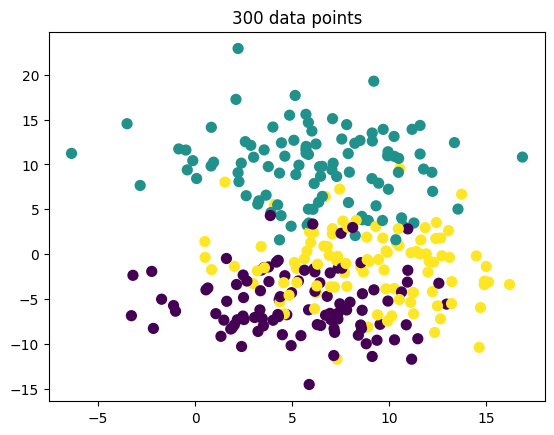

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
import seaborn as sns

data, labels  = make_blobs(n_samples=300, cluster_std=4, random_state=13)

plt.scatter(data[:, 0], data[:, 1], c=labels, s=50)
plt.title('300 data points')

#### 2. Viết hàm tính Phân cụm theo format ở slide số 16. (2 điểm)

In [82]:
def kmeans(data_set, k):
    num_features = data_set.shape[1]
    centroids = get_random_centroids(num_features, k)
    old_centroids = None

    while not should_stop(old_centroids, centroids):
        old_centroids = centroids
        labels = get_labels(data_set, centroids)
        centroids = get_centroids(data_set, labels, k)

    return centroids,labels

def should_stop(old_centroids, centroids):
    return np.array_equal(old_centroids, centroids)

def get_random_centroids(num_features, k):
    return np.random.rand(k, num_features)  # Trả về mảng ngẫu nhiên kích thước (k, num_features)

def get_labels(data_set, centroids):
    distances = np.linalg.norm(data_set[:, None] - centroids, axis=2)  # Tính khoảng cách đến các tâm cụm
    labels = np.argmin(distances, axis=1)  # Chọn nhãn cụm gần nhất
    return labels

def get_centroids(data_set, labels, k):
    centroids = np.zeros((k, data_set.shape[1]))
    for i in range(k):
        points_in_cluster = data_set[labels == i]
        if len(points_in_cluster) > 0:
            centroids[i] = np.mean(points_in_cluster, axis=0)
        else:
            centroids[i] = get_random_centroids(data_set.shape[1], k)
    return centroids

#### 3. Chạy hàm tính K-means với dữ liệu ở trên. (1 điểm)

In [83]:
kmeans_labels,_ = kmeans(data, 4)

print(kmeans_labels)

ValueError: could not broadcast input array from shape (4,2) into shape (2,)

#### 4. Viết hàm tính độ lệch khoảng cách trung bình giữa các cụm. (2 điểm)

In [ ]:
def avg_distance_deviation(data, centroids, labels):
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    cluster_distances = {}
    for i in range(len(centroids)):
        cluster_distances[i] = distances[:, i][labels == i]

    total_deviation = 0
    for i in range(len(centroids)):
        total_deviation += np.std(cluster_distances[i])

    return total_deviation / len(centroids)

#### 5. Chạy hàm tính Phân cụm ở trên 3 lần và in ra độ lệch khoảng cách trung bình giữa các cụm (1 điểm)

In [ ]:
test_Centroids = []
test_Labels = []
test_Distance_Deviation = []

for i in range(3):
    centroids,labels = kmeans(data, 4)
    test_Centroids.append(centroids)
    test_Labels.append(labels)

for index in range(len(test_Centroids)):
    Distance_Deviation = avg_distance_deviation(data, test_Centroids[index], test_Labels[index])
    print(f'Lần chạy thứ {index + 1}: Độ lệch khoảng cách trung bình giữa các cụm = {Distance_Deviation}')
    test_Distance_Deviation.append(Distance_Deviation)

NameError: name 'num_features' is not defined

#### 6. Vẽ centroid và màu khác nhau cho các cụm ở lần phân cụm tốt nhất. (1 điểm)

In [ ]:
min_index_distance = np.argmin(test_Distance_Deviation)
colors_dict = {0: 'y', 1: 'b', 2: 'cyan', 3: 'm'}
print(f'Chọn lần thử thứ {min_index_distance + 1}')
colors = [colors_dict[i] for i in test_Labels[min_index_distance]]

for i, color in enumerate(np.unique(test_Labels[min_index_distance])):
    sns.scatterplot(x = data[test_Labels[min_index_distance] == color][:, 0], 
                y = data[test_Labels[min_index_distance] == color][:, 1], 
                color=colors_dict[color], s= 60 ,
                label=f'Cluster {color}')
sns.scatterplot(x = test_Centroids[min_index_distance][:, 0], 
                y = test_Centroids[min_index_distance][:, 1],
                color='red', marker='v',
                s = 100,
                label ='Centroid')
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()